In [1]:
#import the required data analysis libraries
from ast import literal_eval
import pandas as pd
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import seaborn as sns
sns.set()

In [2]:
#import classified dataaset
df = pd.read_csv('G500_ECMAT_Labelled_27k.csv',  index_col = 0)
print(df.shape)
df.head()

(27198, 32)


,UI,name,year,Meta,Text,ticker,sector,website,roe,roc,ebita,npm,BM,Ops,CX,Practice,Product,Enabler,set,len,topics,AI,Cloud computing,IoT,Virtual reality,Augmented reality,Robotics,Analytics,Mobile,Social,3D printing,Blockchain
1,76,BASF,2019,"BASF SE, Q3 2019 Earnings Call, Oct 24, 2019",The investment underlines our commitmenttoward...,XTRA:BAS,Chemicals,http://www.basf.com,16.0%,NaN,NaN,NaN,0,0,0,0,0,1,1,1,['Analytics'],0,0,0,0,0,0,1,0,0,0,0
3,76,BASF,2019,"Banco Bradesco S.A., Q4 2018 Earnings Call, Ja...",And the digital clients have been growing very...,BOVESPA:BBDC4,Chemicals,http://www.basf.com,16.0%,NaN,NaN,NaN,0,0,3,0,0,0,3,1,"['Analytics', 'Mobile']",0,0,0,0,0,0,1,1,0,0,0
7,76,BASF,2019,"Banco Bradesco S.A., Q4 2018 Earnings Call, Ja...",Just to give you an idea to you of personal lo...,BOVESPA:BBDC4,Chemicals,http://www.basf.com,16.0%,NaN,NaN,NaN,0,0,3,0,0,0,3,1,"['Analytics', 'Mobile']",0,0,0,0,0,0,1,1,0,0,0
11,76,BASF,2019,"Banco Bradesco S.A., Q4 2018 Earnings Call, Ja...","And therefore, favorable to new investment. We...",BOVESPA:BBDC4,Chemicals,http://www.basf.com,16.0%,NaN,NaN,NaN,0,0,0,0,0,2,2,1,['Analytics'],0,0,0,0,0,0,1,0,0,0,0
12,76,BASF,2019,"Banco Bradesco S.A., Q4 2018 Earnings Call, Ja...",And we have other initiatives as well that are...,BOVESPA:BBDC4,Chemicals,http://www.basf.com,16.0%,NaN,NaN,NaN,0,0,3,0,3,0,3,2,"['Analytics', 'Mobile']",0,0,0,0,0,0,1,1,0,0,0


In [3]:
#select technology columns in a list
tech = ['AI', 'Cloud computing', 'IoT', 'Virtual reality', 'Augmented reality', 'Robotics', 'Analytics',
        'Mobile', 'Social', '3D printing', 'Blockchain']

In [4]:
#assign the maturity class of each document to the technology that was detected
from tqdm import tqdm
for i in tqdm(range(len(df['set']))):
    for j in tech:
        if df[j].iloc[i] > 0:
            df[j].iloc[i] = df['set'].iloc[i]

  0%|          | 0/27198 [00:00<?, ?it/s]/Users/ahmedalali/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
100%|██████████| 27198/27198 [00:12<00:00, 2218.40it/s]


In [5]:
#Group by Sector, Company & Year
group = df.groupby(['sector', 'name', 'year']).agg({'ticker':'first' , 'website':'first', 'BM':(lambda x: np.sum(x.unique())), 
                          'Ops':(lambda x: np.sum(x.unique())), 'CX':(lambda x: np.sum(x.unique())), 
                        'Practice':(lambda x: np.sum(x.unique())), 'Product':(lambda x: np.sum(x.unique())), 'Enabler':(lambda x: np.sum(x.unique())),
                        'set':(lambda x: np.sum(x.unique())), 'len':'sum', 'AI':(lambda x: np.sum(x.unique())),
                        'Cloud computing':(lambda x: np.sum(x.unique())),
                        'IoT':(lambda x: np.sum(x.unique())), 'Virtual reality':(lambda x: np.sum(x.unique())), 'Augmented reality':(lambda x: np.sum(x.unique())),
                        'Robotics':(lambda x: np.sum(x.unique())),
                          'Analytics':(lambda x: np.sum(x.unique())), 'Mobile':(lambda x: np.sum(x.unique())), 'Social':(lambda x: np.sum(x.unique())), '3D printing':(lambda x: np.sum(x.unique())), 
                          'Blockchain':(lambda x: np.sum(x.unique()))})
group.shape

(1222, 21)

In [6]:
#Make a copy of columns with DT maturity values for visualization
gr = group[['BM', 'Ops', 'CX', 'Practice', 'Product', 'Enabler', 'set', 'AI', 'Cloud computing',
 'IoT', 'Virtual reality', 'Augmented reality', 'Robotics', 'Analytics', 'Mobile', 'Social', 
 '3D printing', 'Blockchain']].copy()
gr.head()

BM  Ops  CX  Practice  Product  Enabler  set  AI  Cloud computing  IoT  Virtual reality  Augmented reality  Robotics  Analytics  Mobile  Social  3D printing  Blockchain
sector              name         year                                                                                                                                                                          
Aerospace & Defense Airbus Group 2015   2    5   0         2        5        5    5   0                0    0                0                  0         0          5       0       0            0           0
                                 2016   0    3   0         0        3        6    6   0                0    0                0                  0         0          6       0       0            0           0
                                 2017   2    6   0         2        5        6    6   0                0    0                0                  0         0          6       0       0            0           0
                                 2018   0    2   0         2        6        5    6   0                0    0                0                  0         5          6       0       0            0           0
                                 2019   2    3   2         3        6        6    6   2                0    0                0                  0         6          6       0       0            0           0

In [7]:
#Create an aggregate maturity score for Digital & Transformation capabilities
gr['D cap'] = gr[['BM', 'Ops', 'CX', 'Product']].mean(axis = 1)
gr['T cap'] = gr[['Practice', 'Enabler']].mean(axis = 1)

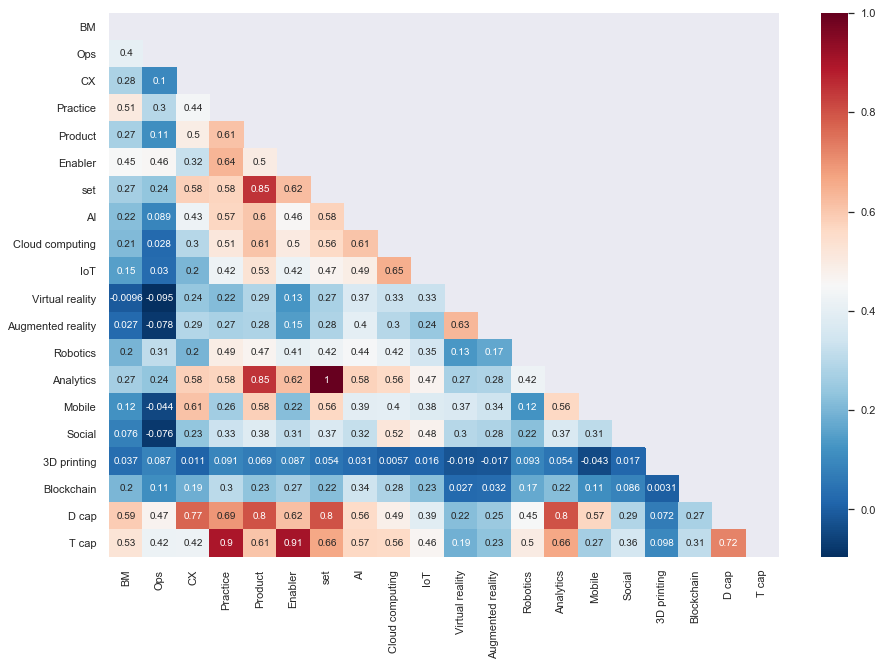

In [8]:
#Plot a correlation matrix to understand the interdependencies between capabilities
plt.figure(figsize=(15, 10))

mask = np.triu(np.ones_like(gr.corr(), dtype=np.bool))

sns.heatmap(gr.corr(), mask = mask, cmap = 'RdBu_r', annot = True)

plt.show()

In [9]:
#Take the maximum maturity acheived across the 5 years for each capabilities
com = group.groupby(['sector', 'name']).agg('max')
com.shape

(295, 20)

In [10]:
#Select the top 17 capabilities
#was selected previously based on sparsity (50% of vlaues > 0)

com = com[['set', 'BM', 'Ops', 'CX', 'Product', 'Practice', 'Enabler', 'AI', 'Cloud computing', 
           'IoT', 'Virtual reality', 'Augmented reality', 'Robotics', 'Analytics', 'Mobile', 'Social', 
           '3D printing', 'Blockchain']]

In [11]:
com['D-cap'] = com[['BM', 'Ops', 'CX', 'Product']].mean(axis=1)
com['T-cap'] = com[['Practice', 'Enabler']].mean(axis=1)

In [12]:
#rename some of the columns
com.columns = ['Maturity', 'BM', 'Ops', 'CX', 'Product', 'Practice', 'Enabler', 'AI', 'Cloud computing', 'IoT', 
               'Virtual reality', 'Augmented reality', 'Robotics', 'Analytics', 'Mobile', 'Social', 
               '3D printing', 'Blockchain', 'D-cap', 'T-cap']

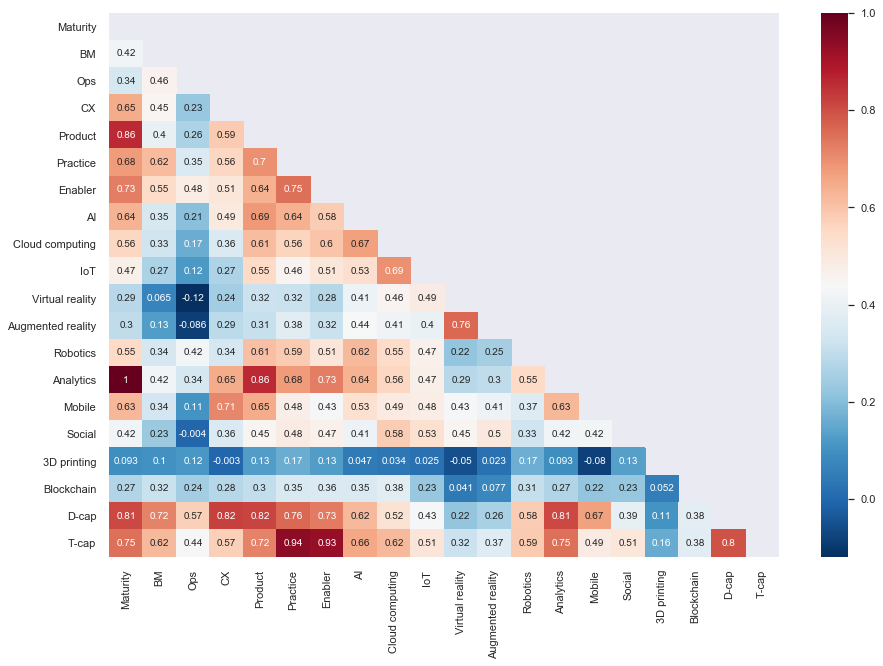

In [13]:
#correlation matrix on a company level
plt.figure(figsize=(15, 10))

corrmat = com.corr(method='pearson')
mask = np.triu(np.ones_like(corrmat, dtype=np.bool))

sns.heatmap(corrmat.round(3), mask = mask, cmap = 'RdBu_r', annot = True)

plt.show()

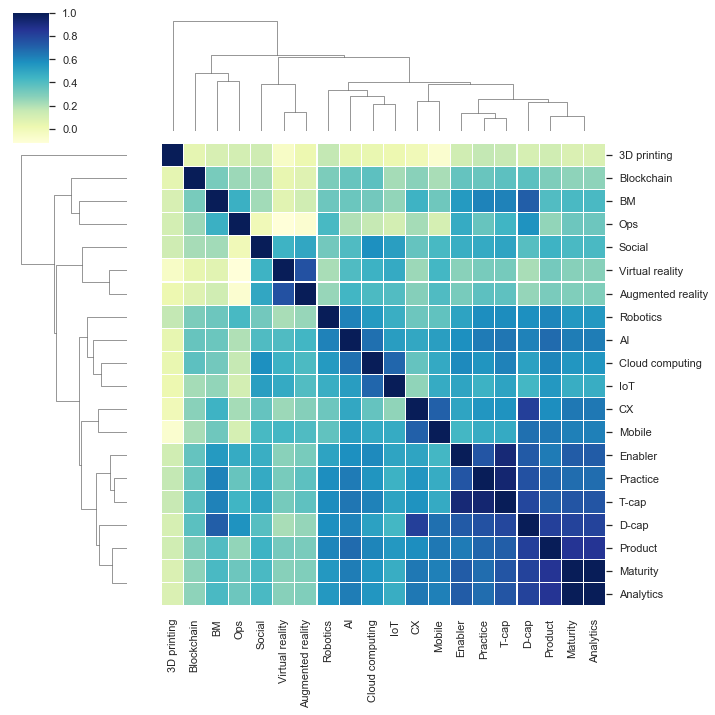

In [14]:
#Apply hierarchical clustering to build intuition on the data structure
cg = sns.clustermap(corrmat, cmap="YlGnBu", linewidths=0.1);
plt.setp(cg.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
cg


In [15]:
#reset index to get sector & company name as columns
com.reset_index(inplace = True)

In [16]:
com.head()

,sector,name,Maturity,BM,Ops,CX,Product,Practice,Enabler,AI,Cloud computing,IoT,Virtual reality,Augmented reality,Robotics,Analytics,Mobile,Social,3D printing,Blockchain,D-cap,T-cap
0,Aerospace & Defense,Airbus Group,6,2,6,2,6,3,6,2,0,0,0,0,6,6,0,0,0,0,4.00,4.5
1,Aerospace & Defense,BAE Systems,10,3,5,0,9,5,6,3,0,0,0,0,4,10,2,0,0,0,4.25,5.5
2,Aerospace & Defense,Boeing,10,6,6,5,10,10,10,4,4,0,0,0,6,10,2,0,0,0,6.75,10.0
3,Aerospace & Defense,General Dynamics,5,0,0,0,3,0,2,0,0,0,0,0,0,5,3,3,0,0,0.75,1.0
4,Aerospace & Defense,Lockheed Martin,10,0,3,0,10,4,6,3,0,0,0,0,0,10,0,0,0,0,3.25,5.0


In [17]:
#import financial ratios dataset
df2 = pd.read_csv('Fortune 500/G500_financials_mean.csv')
print(df2.shape)
df2.head()

(459, 19)


,name,revenue_15,profit_15,assets_15,revenue_16,profit_16,assets_16,revenue_17,profit_17,assets_17,revenue_18,profit_18,assets_18,Revenues,Profits,Assets,mean_profit,mean_revenue,mean_npm
0,3M,31821.0,4956,31269.0,30274.0,4833.0,32718.0,30109.0,5050.0,32906.0,31657.0,4858.0,37987.0,32765.0,5349.0,36500.0,5022.500,31325.2,0.160334
1,ABB,39830.0,2594,44878.0,35481.0,1933.0,41356.0,33828.0,1899.0,39499.0,34312.0,2213.0,43262.0,37360.0,2173.0,44441.0,2054.500,36162.2,0.056813
2,Abbott Laboratories,27390.0,477.0,NaN,27390.0,477.0,NaN,27390.0,477.0,NaN,27390.0,477.0,76250.0,30578.0,2368.0,67173.0,949.750,28027.6,0.033886
3,AbbVie,22859.0,5144.0,NaN,22859.0,5144.0,53050.0,25638.0,5953.0,66099.0,28216.0,5309.0,70786.0,32753.0,5687.0,59352.0,5523.250,26465.0,0.208700
4,Accenture,31875.0,2941.5,17930.5,32914.0,3054.0,18266.0,34798.0,4111.9,20609.0,36766.0,3445.1,22690.0,40993.0,4059.9,24449.1,3667.725,35469.2,0.103406


In [18]:
#merge Aspect maturity dataset with financial ratios
comp = com.merge(df2, left_on = 'name', right_on = 'name')

In [19]:
comp.shape

(258, 40)

In [20]:
comp['mat'] = comp['Maturity'].round()

In [21]:
#Creat a function to plot cluster elbow
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
def elbow(dataset):
    from sklearn.cluster import KMeans
    scaler = MinMaxScaler()
    data_log = np.log(dataset+1)
    scaler.fit(data_log)
    data_log_norm = scaler.transform(data_log)
    
    # Fit KMeans and calculate SSE for each *k*
    sse = {}
    for k in range(1, 16):
        kmeans = KMeans(n_clusters=k, random_state=1)
        kmeans.fit(data_log_norm)
        sse[k] = kmeans.inertia_

    # Plot SSE for each *k*
    plt.title('The Elbow Method')
    plt.xlabel('k'); plt.ylabel('SSE') 
    return sns.pointplot(x=list(sse.keys()), y=list(sse.values()))

In [22]:
#Clustering function with scaling and log trx
from sklearn.cluster import KMeans
def cluster(dataset, n):
    from sklearn.cluster import KMeans
    scaler = MinMaxScaler()
    data_log = np.log(dataset+0.1)
    scaler.fit(data_log)
    data_log_norm = scaler.transform(data_log)
    kmeans = KMeans(n_clusters=n, random_state=1)

    kmeans.fit(data_log_norm)

    cluster_labels = kmeans.labels_


    data_log_norm = pd.DataFrame(data_log_norm.round(2),
                                     index = dataset.index,
                                     columns = dataset.columns)
    gr4_kn = data_log_norm.assign(Cluster = cluster_labels)
    return gr4_kn

In [23]:
#Select top 12 features for clustering
x = comp[[  'BM', 'Ops', 'CX', 'Product', 'Practice', 'Enabler', 'AI', 'Cloud computing', 'IoT', 
          'Analytics', 'Mobile', 'mat']].copy()

In [24]:
#cluster using k=10
x = cluster(x, 10)

In [25]:
#count the members of each cluster
x['Cluster'].value_counts()

3    40
0    39
6    32
7    29
4    28
2    26
1    26
9    14
5    13
8    11
Name: Cluster, dtype: int64

In [26]:
x.head()

,BM,Ops,CX,Product,Practice,Enabler,AI,Cloud computing,IoT,Analytics,Mobile,mat,Cluster
0,0.66,0.89,0.66,0.89,0.74,0.89,0.66,0.00,0.0,0.77,0.00,0.77,3
1,0.89,0.89,0.85,1.00,1.00,1.00,0.80,0.80,0.0,1.00,0.66,1.00,0
2,0.00,0.00,0.00,0.74,0.00,0.66,0.00,0.00,0.0,0.69,0.74,0.69,9
3,0.00,0.74,0.00,1.00,0.80,0.89,0.74,0.00,0.0,1.00,0.00,1.00,4
4,0.00,0.66,0.00,0.89,0.66,0.89,0.85,0.66,0.0,0.77,0.66,0.77,4


In [28]:
#use TSNE to reduce dimensionality to 2d using the normalized data without passing the cluster value
from sklearn.manifold import TSNE

plt.figure(figsize=(10, 7))
tsne_embedded = TSNE(n_components=2, random_state=42, perplexity = 10, learning_rate=200, n_iter=1000).fit_transform(x.drop('Cluster', axis = 1))


<Figure size 720x504 with 0 Axes>

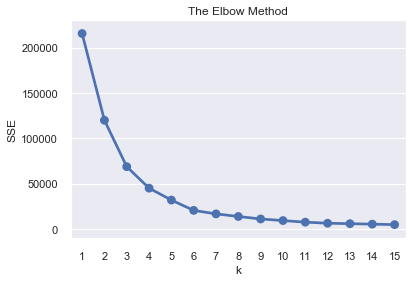

In [29]:
#Assess number of clusters on lower dimensional data
sse = {}
for k in range(1, 16):
    kmeans = KMeans(n_clusters=k, random_state=1)
    kmeans.fit(tsne_embedded)
    sse[k] = kmeans.inertia_

# Plot SSE for each *k*
plt.title('The Elbow Method')
plt.xlabel('k'); plt.ylabel('SSE') 
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

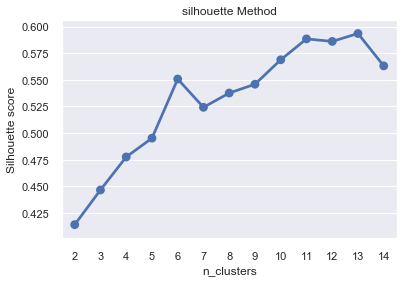

In [33]:
#Given that the data has a hierarchical structure, use Silhouette score to evaluate cluster number
from sklearn.metrics import silhouette_score
clusters = []
scores = []
range_n_clusters = list (range(2,15))
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters)
    #clusters.apped(n_clusters)
    preds = clusterer.fit_predict(tsne_embedded)
    centers = clusterer.cluster_centers_

    score = silhouette_score(tsne_embedded, preds)
    scores.append(score)
    #print("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))

sns.pointplot(x=list (range(2,15)), y=scores)
plt.xlabel('n_clusters')
plt.ylabel('Silhouette score')
plt.title('silhouette Method')
plt.show()

In [34]:
#Create a dataframe for the TSNE embedding of companies
df_tsne = pd.DataFrame(tsne_embedded)

In [35]:
#Cluster data on 2d
kmeans = KMeans(n_clusters=10, random_state=1)

kmeans.fit(pd.DataFrame(df_tsne))

cluster_labels = kmeans.labels_


df_tsne = pd.DataFrame(df_tsne,
                                 index = df_tsne.index,
                                 columns = df_tsne.columns).round(2)
gr4_kn = df_tsne.assign(Cluster = cluster_labels)

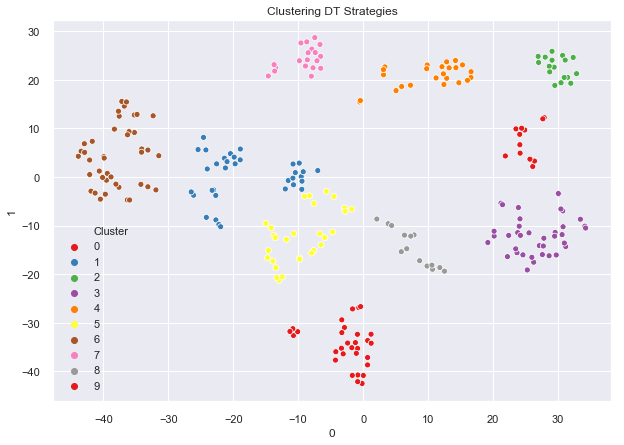

In [36]:
#plot the clustering map
plt.figure(figsize=(10, 7))
sns.scatterplot(data = gr4_kn, x = 0, 
                    y = 1, hue = 'Cluster', palette="Set1")
plt.title('Clustering DT Strategies')
plt.show()

In [37]:
#add the cluster number to original data
x['Cluster'] = gr4_kn['Cluster'].copy()

In [38]:
#cluster importance
cluster_avg = x.groupby(['Cluster']).mean()

population_avg = x.drop('Cluster', axis = 1).mean()

relative_imp = (cluster_avg / population_avg -1).round(2)

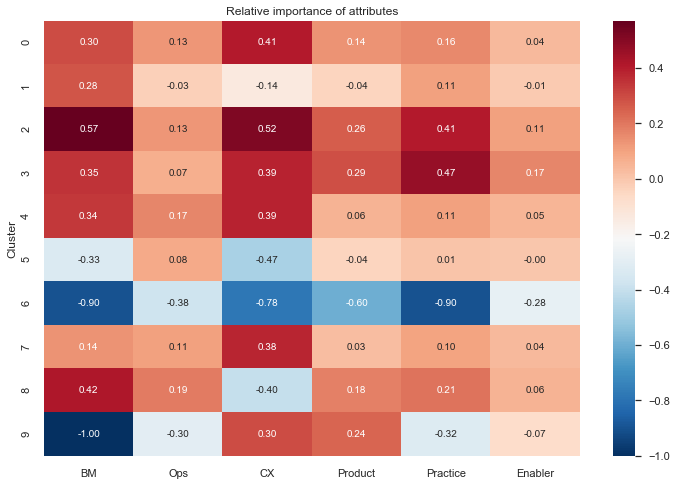

In [39]:
#Plot a heatmap for clusters based on capabilities
plt.figure(figsize=(12, 8))
plt.title('Relative importance of attributes') 
sns.heatmap(data=relative_imp.iloc[:,:6].round(2), annot=True, fmt='.2f', cmap='RdBu_r') 
plt.show()

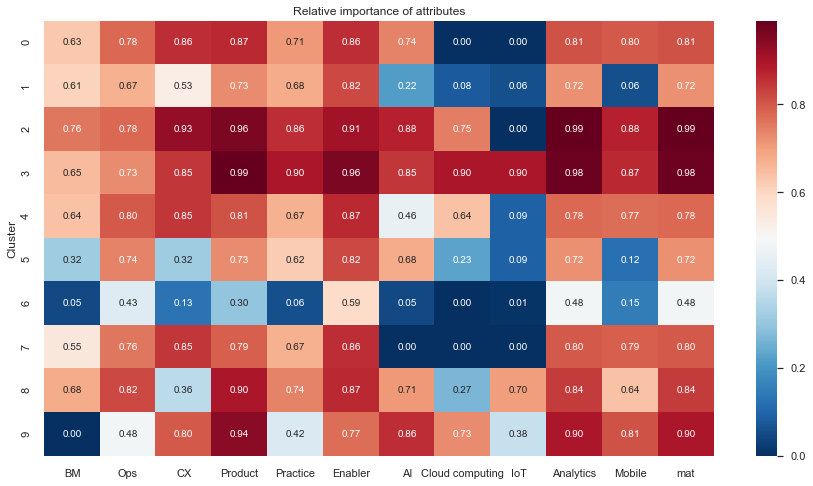

In [40]:
#Plot a heatmap for clusters based on capabilities
plt.figure(figsize=(15, 8))
plt.title('Relative importance of attributes') 
sns.heatmap(data=cluster_avg.round(2), annot=True, fmt='.2f', cmap='RdBu_r') 
plt.show()

In [41]:
#print the mean net profit margin of each cluster
pd.DataFrame([x['Cluster'], comp['mean_npm']]).T.groupby('Cluster').agg('mean')

,mean_npm
Cluster,
0.0,0.069453
1.0,0.049848
2.0,0.124300
3.0,0.095222
4.0,0.086993
5.0,0.071824
6.0,0.087688
7.0,0.073387
8.0,0.030672


In [42]:
#concat dataframes to add TSNE embeddings and cluster namber to the dataset for visualization on Tableau
dfz = pd.concat([comp,gr4_kn], axis = 1)

In [43]:
dfz.head()

,sector,name,Maturity,BM,Ops,CX,Product,Practice,Enabler,AI,Cloud computing,IoT,Virtual reality,Augmented reality,Robotics,Analytics,Mobile,Social,3D printing,Blockchain,D-cap,T-cap,revenue_15,profit_15,assets_15,revenue_16,profit_16,assets_16,revenue_17,profit_17,assets_17,revenue_18,profit_18,assets_18,Revenues,Profits,Assets,mean_profit,mean_revenue,mean_npm,mat,0,1,Cluster
0,Aerospace & Defense,Airbus Group,6,2,6,2,6,3,6,2,0,0,0,0,6,6,0,0,0,0,4.00,4.5,80537.6,3108.1,116275.9,71493.0,2991.0,115877.0,73628.0,1100.3,117204.0,75261.0,3238.5,136812.0,75185.0,3604.2,131671.3,2733.50,75220.92,0.036340,6,-9.530000,0.090000,1
1,Aerospace & Defense,Boeing,10,6,6,5,10,10,10,4,4,0,0,0,6,10,2,0,0,0,6.75,10.0,90762.0,5446,99198.0,96114.0,5176.0,94408.0,94571.0,4895.0,89997.0,93392.0,8197.0,92333.0,101127.0,10460.0,117359.0,7182.00,95193.20,0.075447,10,32.900002,21.299999,2
2,Aerospace & Defense,General Dynamics,5,0,0,0,3,0,2,0,0,0,0,0,0,5,3,3,0,0,0.75,1.0,30852.0,2533,35355.0,31469.0,2965.0,31997.0,31353.0,2955.0,32872.0,30973.0,2912.0,35046.0,36193.0,3345.0,45408.0,3044.25,32168.00,0.094636,5,-35.250000,12.790000,6
3,Aerospace & Defense,Lockheed Martin,10,0,3,0,10,4,6,3,0,0,0,0,0,10,0,0,0,0,3.25,5.0,45600.0,3614,37073.0,46132.0,3605.0,49128.0,50658.0,5302.0,47806.0,51048.0,2002.0,46521.0,53762.0,5046.0,44876.0,3988.75,49440.00,0.080679,10,-9.770000,-16.680000,5
4,Aerospace & Defense,Northrop Grumman,6,0,2,0,6,2,6,5,2,0,0,0,2,6,2,2,0,0,2.00,4.0,23979.0,2069,26572.0,23526.0,1990.0,24454.0,24508.0,2200.0,25614.0,25803.0,2015.0,34917.0,30095.0,3229.0,37653.0,2358.50,25582.20,0.092193,6,-6.470000,-13.990000,5


In [44]:
#drop some columns
dfz = dfz[['sector', 'name', 'Maturity', 'BM', 'Ops', 'CX', 'Product', 'Practice', 'Enabler', 'AI', 'Cloud computing', 
           'IoT', 'Virtual reality', 'Augmented reality', 'Robotics', 'Analytics', 'Mobile', 'Social', 
           '3D printing', 'Blockchain', 'D-cap', 'T-cap',  'mean_profit', 'mean_revenue', 'mean_npm', 
           'mat', 0, 1, 'Cluster']]

In [45]:
#rename some columns
dfz.columns = ['sector', 'name', 'Maturity', 'BM', 'Ops', 'CX', 'Product', 'Practice', 'Enabler', 'AI', 'Cloud computing', 
           'IoT', 'Virtual reality', 'Augmented reality', 'Robotics', 'Analytics', 'Mobile', 'Social', 
           '3D printing', 'Blockchain', 'D-cap', 'T-cap',  'mean_profit', 'mean_revenue', 'mean_npm', 
           'mat', 'TSNE 1', 'TSNE 2', 'Cluster']

In [46]:
#melt the data to make it compatible for visualization on Tableau
dfz = pd.melt(dfz, id_vars =['sector', 'name', 'TSNE 1', 'TSNE 2', 'Cluster', 'mean_npm'])

In [47]:
#Check data
dfz.head(10)

,sector,name,TSNE 1,TSNE 2,Cluster,mean_npm,variable,value
0,Aerospace & Defense,Airbus Group,-9.530000,0.090000,1,0.036340,Maturity,6.0
1,Aerospace & Defense,Boeing,32.900002,21.299999,2,0.075447,Maturity,10.0
2,Aerospace & Defense,General Dynamics,-35.250000,12.790000,6,0.094636,Maturity,5.0
3,Aerospace & Defense,Lockheed Martin,-9.770000,-16.680000,5,0.080679,Maturity,10.0
4,Aerospace & Defense,Northrop Grumman,-6.470000,-13.990000,5,0.092193,Maturity,6.0
5,Aerospace & Defense,Raytheon,-9.770000,-16.940001,5,0.093702,Maturity,10.0
6,Aerospace & Defense,United Technologies,15.320000,23.110001,4,0.090741,Maturity,6.0
7,Apparel,Adidas,-0.530000,15.470000,4,0.057369,Maturity,10.0
8,Apparel,Nike,30.750000,25.059999,2,0.102199,Maturity,10.0
9,Business Services,Adecco Group,31.150000,24.100000,2,0.021365,Maturity,10.0


In [48]:
#write to csv 
#dfz.to_csv('G500_clustered_max_258.csv', index = False)